In [1]:
import pandas as pd
from feature_handling import FeatureHandling2 as FH
from splitter_sampler import SplitterSampler as SS
from dataframe_observer import DataframeObserver as DO
from modeling import Modeling
from evaluation import BinClsEvaluation

titanic = pd.read_csv('../data/titanic.csv')
DO.read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               Dtype  Count  unique   unique%  missing  missing%
PassengerId    int64    846     846  1.000000        0  0.000000
Pclass         int64    846       3  0.003546        0  0.000000
Name          object    846     846  1.000000        0  0.000000
Sex           object    846       2  0.002364        0  0.000000
Age          float64    676      86  0.101655      170  0.200946
SibSp          int64    846       7  0.008274        0  0.000000
Parch          int64    846       7  0.008274        0  0.000000
Ticket        object    846     652  0.770686        0  0.000000
Fare         float64    846     243  0.287234        0  0.000000
Cabin         object    192     143  0.169031      654  0.773050
Embarked      object    844       3  0.003546        2  0.002364
Survived       int64    846       2  0.002364        0  0.000000
------------------


In [2]:
titanic = titanic[['Pclass','Sex','Fare','Age','SibSp',
                    'Parch','Embarked','Survived']]
DO.read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    846       3  0.003546        0  0.000000
Sex        object    846       2  0.002364        0  0.000000
Fare      float64    846     243  0.287234        0  0.000000
Age       float64    676      86  0.101655      170  0.200946
SibSp       int64    846       7  0.008274        0  0.000000
Parch       int64    846       7  0.008274        0  0.000000
Embarked   object    844       3  0.003546        2  0.002364
Survived    int64    846       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


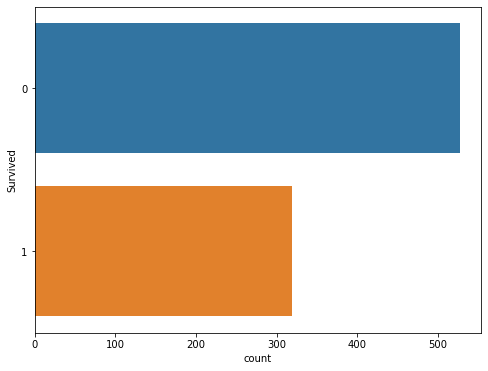

In [3]:
DO.describe_cat_col(titanic,'Survived')

In [4]:
train,test = SS.split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
DO.read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    676       3  0.004438        0  0.000000
Sex        object    676       2  0.002959        0  0.000000
Fare      float64    676     221  0.326923        0  0.000000
Age       float64    537      83  0.122781      139  0.205621
SibSp       int64    676       7  0.010355        0  0.000000
Parch       int64    676       6  0.008876        0  0.000000
Embarked   object    675       3  0.004438        1  0.001479
Survived    int64    676       2  0.002959        0  0.000000
------------------


-------------------------------------------------
['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


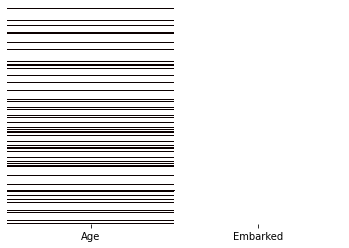

In [6]:
fh = FH(train, test)
DO.missing_pattern(train.drop(['Survived'],axis=1),only_missing_col=True)

In [7]:
fh.imputer('Age','median')
fh.imputer('Embarked','mode')
train_ed,test_ed=fh.general_encoder(['Fare','Age'],None,['Pclass','Sex','SibSp','Parch','Embarked'])

In [8]:
DO.read_df_info(train_ed)
DO.read_df_info(test_ed)

------------------
676 rows, 24 columns.
------------------
              Dtype  Count  unique   unique%  missing  missing%
Fare        float64    676     221  0.326923        0       0.0
Age         float64    676      83  0.122781        0       0.0
Pclass_1    float64    676       2  0.002959        0       0.0
Pclass_2    float64    676       2  0.002959        0       0.0
Pclass_3    float64    676       2  0.002959        0       0.0
Sex_female  float64    676       2  0.002959        0       0.0
Sex_male    float64    676       2  0.002959        0       0.0
SibSp_0     float64    676       2  0.002959        0       0.0
SibSp_1     float64    676       2  0.002959        0       0.0
SibSp_2     float64    676       2  0.002959        0       0.0
SibSp_3     float64    676       2  0.002959        0       0.0
SibSp_4     float64    676       2  0.002959        0       0.0
SibSp_5     float64    676       2  0.002959        0       0.0
SibSp_8     float64    676       2  0.002959

In [9]:
X_train, X_test, y_train, y_test= SS.split_train_test(train_ed,test_ed,'Survived')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 23), (170, 23), (676,), (170,))

In [10]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Fare', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
['Fare', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [11]:
md = Modeling(X_train, X_test, y_train, y_test, task='bin', metric='accuracy', random_state=1234, cv=0.2)
y_score, best_model, best_score, best_param = \
    md.modeling(
        model='lr',
        class_weight='balanced',
        hp={'penalty':['l2','l1'],
            'C':[0.01,0.1,1,10,100],
            'solver':['saga']
            }
    )

0:00:02.888685


/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


intercept=-0.25982409010670027


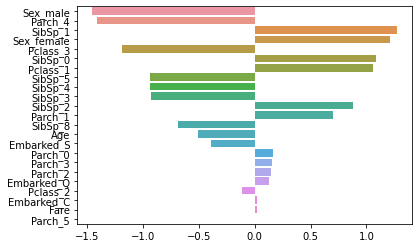

In [12]:
bce = BinClsEvaluation(y_score,y_test)
bce.coefficients_intercept(best_model,X_train.columns.tolist())

In [13]:
best_param

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

intercept=-0.25982409010670027
Sex_male     -1.450253
Parch_4      -1.410532
SibSp_1       1.271034
Sex_female    1.212452
Pclass_3     -1.186617
SibSp_0       1.088400
Pclass_1      1.057456
SibSp_5      -0.938139
SibSp_4      -0.934459
SibSp_3      -0.923678
SibSp_2       0.880419
Parch_1       0.704467
SibSp_8      -0.681376
Age          -0.507816
Embarked_S   -0.387162
Parch_0       0.165067
Parch_3       0.158968
Parch_2       0.143998
Embarked_Q    0.127883
Pclass_2     -0.108640
Embarked_C    0.021478
Fare          0.020641
Parch_5       0.000231
dtype: float64


<AxesSubplot:>

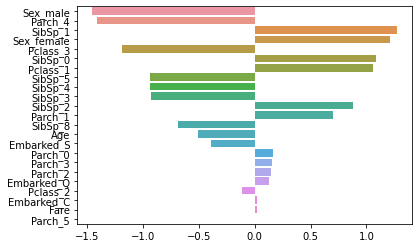

In [14]:
import seaborn as sns
print('intercept=' + str(best_model.intercept_[0]))
pack = sorted(zip(X_train.columns.tolist(), best_model.coef_.tolist()[0], [abs(x) for x in best_model.coef_.tolist()[0]]),
              key=lambda tup: tup[2], reverse=True)
idx, data, data_abs = zip(*pack)
ss = pd.Series(data=data, index=idx)
print(ss)
sns.barplot(x=ss.values, y=ss.index)